https://dacon.io/competitions/official/21265/overview/

# 1주차

# Library

In [1]:
# import matplotlib.font_manager as fm

# # 설치된 폰트 출력
# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np


%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Hancom Gothic'

# Data Load
|columns|information|
|----|-------|
|transaction_id| 인덱스
|apartment_id| 아파트 아이디
|city| 도시
|dong| 동
|jibun| 지번
|apt| 아파트 단지 이름
|addr_kr| 주소
|exclusive_use_area| 전용 면적
|year_of_completion| 설립일자
|transaction_year_month| 거래년월
|transaction_date| 거래 날짜
|floor| 층
|transaction_real_price| 실거래가

In [5]:
train = pd.read_csv('train.csv')
day_care_center = pd.read_csv('day_care_center.csv')
park=pd.read_csv('park.csv')

# 데이터 확인

## 컬럼 확인


In [4]:
print(list(train.columns))

['transaction_id', 'apartment_id', 'city', 'dong', 'jibun', 'apt', 'addr_kr', 'exclusive_use_area', 'year_of_completion', 'transaction_year_month', 'transaction_date', 'floor', 'transaction_real_price']


In [5]:
train = train.drop(['transaction_id'], axis=1)

##  결측값 확인

In [6]:
train.isnull().sum()            

apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
transaction_real_price    0
dtype: int64

## 상위 5개 확인

In [8]:
train.head()

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [9]:
day_care_center.head()

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31


In [10]:
park.head()

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,NaN,NaN,NaN,NaN,NaN,1965.0,2018-08-14
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,NaN,NaN,NaN,NaN,NaN,1968.0,2018-08-14
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,NaN,NaN,NaN,NaN,NaN,1970.0,2018-08-14


## 기본 통계치 요약
- 범주형, 수치형 데이터를 나누어 데이터를 들여다본다.

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   apartment_id            1216553 non-null  int64  
 1   city                    1216553 non-null  object 
 2   dong                    1216553 non-null  object 
 3   jibun                   1216553 non-null  object 
 4   apt                     1216553 non-null  object 
 5   addr_kr                 1216553 non-null  object 
 6   exclusive_use_area      1216553 non-null  float64
 7   year_of_completion      1216553 non-null  int64  
 8   transaction_year_month  1216553 non-null  int64  
 9   transaction_date        1216553 non-null  object 
 10  floor                   1216553 non-null  int64  
 11  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 111.4+ MB


In [12]:
train.describe()[['exclusive_use_area', 'floor', 'transaction_real_price']]

,exclusive_use_area,floor,transaction_real_price
count,1.216553e+06,1.216553e+06,1.216553e+06
mean,7.816549e+01,9.343291e+00,3.822769e+04
std,2.915113e+01,6.606500e+00,3.104898e+04
min,9.260000e+00,-4.000000e+00,1.000000e+02
25%,5.976000e+01,4.000000e+00,1.900000e+04
50%,8.241000e+01,8.000000e+00,3.090000e+04
75%,8.497000e+01,1.300000e+01,4.700000e+04
max,4.243200e+02,8.000000e+01,8.200000e+05


## 컬럼 하나씩 보기

In [13]:
train.columns

Index(['apartment_id', 'city', 'dong', 'jibun', 'apt', 'addr_kr',
       'exclusive_use_area', 'year_of_completion', 'transaction_year_month',
       'transaction_date', 'floor', 'transaction_real_price'],
      dtype='object')

In [14]:
train['apartment_id'].value_counts()

8415     3220
10939    3094
4449     2886
8031     2572
2120     2536
         ... 
4364        1
3701        1
4925        1
10719       1
0           1
Name: apartment_id, Length: 12533, dtype: int64

In [15]:
train['city'].value_counts(normalize=True)*100

서울특별시    61.015426
부산광역시    38.984574
Name: city, dtype: float64

In [16]:
# 서울과 부산 겹치는 부분이 존재할 수 있음.
train['dong'].value_counts() 

상계동    29346
좌동     23255
화명동    21511
용호동    17398
중계동    17079
       ...  
누상동        2
주성동        2
구수동        1
옥인동        1
효제동        1
Name: dong, Length: 473, dtype: int64

In [17]:
# 지번 또한 서울과 부산 겹치는 부분이 존재할 수 있음.
train['jibun'].value_counts()

176-30    6594
17        3709
944       3615
53        3566
479       3435
          ... 
770-37       1
747-35       1
1536-2       1
186-21       1
791-22       1
Name: jibun, Length: 8961, dtype: int64

In [18]:
# 아파트 또한 서울과 부산 겹치는 부분이 존재할 수 있음
train['apt'].value_counts()

현대          13154
한신           9766
삼성           6729
대우           6216
신동아          5851
            ...  
(743-18)        1
부에나비스타          1
(745-70)        1
영일아트빌           1
다대에코하임          1
Name: apt, Length: 10440, dtype: int64

In [19]:
# 겹치는 부분이 존재하지 않을 가능성이 높음
train['addr_kr'].value_counts()

용호동 944 오륙도에스케이뷰       3220
신천동 17 파크리오            3094
다대동 1550 몰운대           2886
미아동 1353 에스케이북한산시티     2572
다대동 1624 다대동롯데캐슬몰운대    2536
                       ... 
등촌동 670-2 등촌동성원           1
구로동 793-34 송림주택           1
서초동 1496-24 트라움하우스3       1
삼성동 5-3 골든카운티             1
구로동 744-47 (744-47)       1
Name: addr_kr, Length: 12533, dtype: int64

In [20]:
# 최근에 완공 된 건물은 집 값이 비싸지 않을까 ?
train['year_of_completion'].value_counts()

2004    71809
2003    62520
2005    61832
1999    58578
1996    56892
2006    49669
2002    49142
1988    48215
1998    47765
1997    47108
2000    46116
2001    44627
2008    41203
1993    39943
1992    38863
1995    37201
2007    34989
1994    32455
1989    27149
2009    23890
2011    22032
1991    21365
2010    21070
1986    20209
2012    18877
1987    18160
1983    16551
2013    15743
2014    15359
1990    15158
1984    14357
1982    12826
1985    12798
1980    12488
1979     9666
1981     9233
1978     9038
2015     8357
2016     4873
1977     3468
1976     3044
1975     2930
1974     2430
2017     1967
1971     1675
1969      603
1970      580
1973      529
1972      494
1962      427
1968      183
1966       42
1961       22
1967       20
1965       13
Name: year_of_completion, dtype: int64

In [21]:
# 거래 날짜를 통해 실거래가의 신뢰도를 구할 수 있지 않을까??
train['transaction_year_month'].value_counts()

201503    22444
201610    19072
201606    18296
201705    18080
201504    17970
          ...  
201201     4351
201207     4003
201208     3920
200811     3433
200812     3400
Name: transaction_year_month, Length: 119, dtype: int64

In [22]:
# 위와 동일
train['transaction_date'].value_counts()

11~20    408385
1~10     391715
21~31    250588
21~30    134017
21~28     22199
21~29      9649
Name: transaction_date, dtype: int64

In [23]:
# 층수가 높으면, 낮으면 가격에 어떤 영향을 미칠까?
train['floor'].value_counts()

 5     88676
 4     88399
 3     85549
 2     82589
 1     74927
       ...  
 78        4
 80        4
-4         4
 76        3
 79        2
Name: floor, Length: 84, dtype: int64

# 데이터 시각화

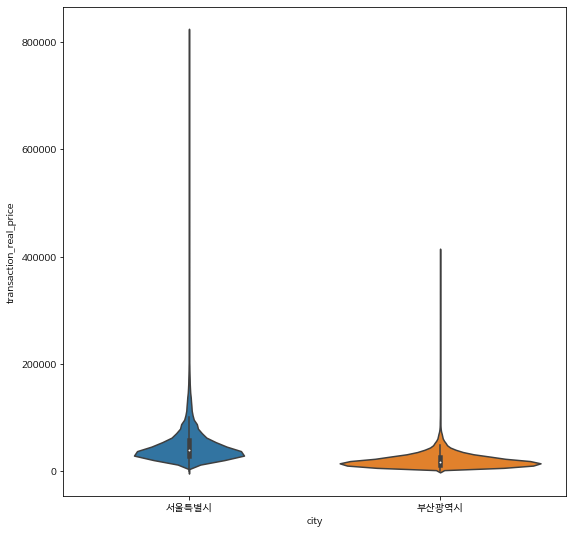

In [24]:
sns.violinplot('city', 'transaction_real_price', data=train.sample(frac=1, random_state=42))
plt.gcf().set_size_inches(9,9)

In [9]:
train['exclusive_use_area']//10

0           8.0
1           9.0
2           8.0
3          14.0
4          19.0
           ... 
1216548     5.0
1216549     8.0
1216550     8.0
1216551    10.0
1216552     8.0
Name: exclusive_use_area, Length: 1216553, dtype: float64

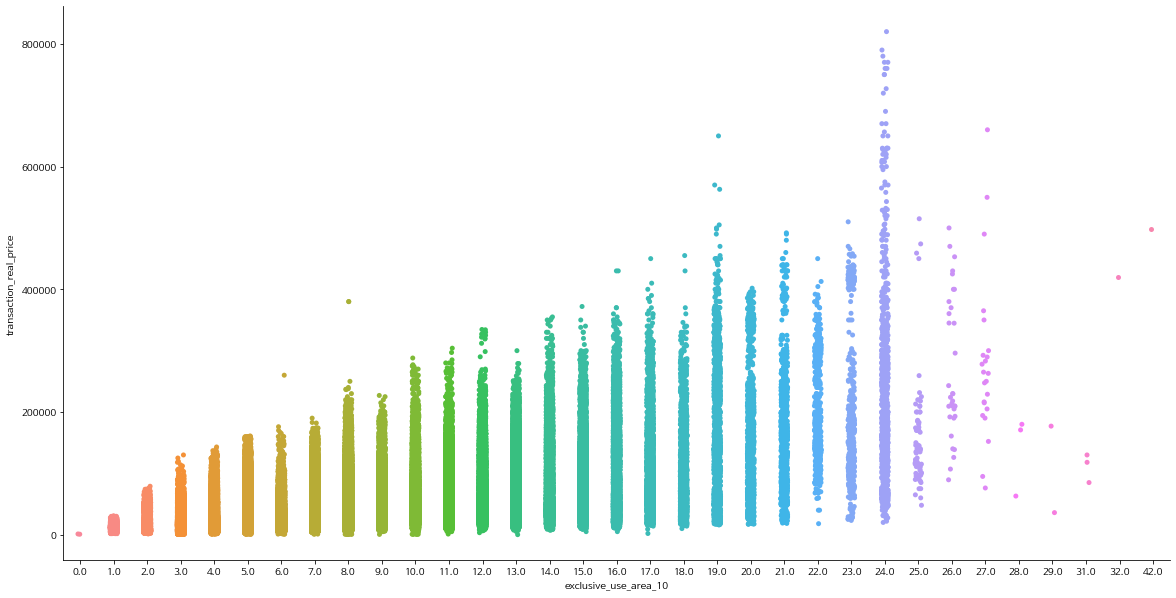

In [25]:
train['exclusive_use_area_10']=train['exclusive_use_area']//10
sns.catplot('exclusive_use_area_10','transaction_real_price', data=train.sample(frac=1, random_state=42))
plt.gcf().set_size_inches(20,9)
train.drop(['exclusive_use_area_10'], axis=1, inplace=True)

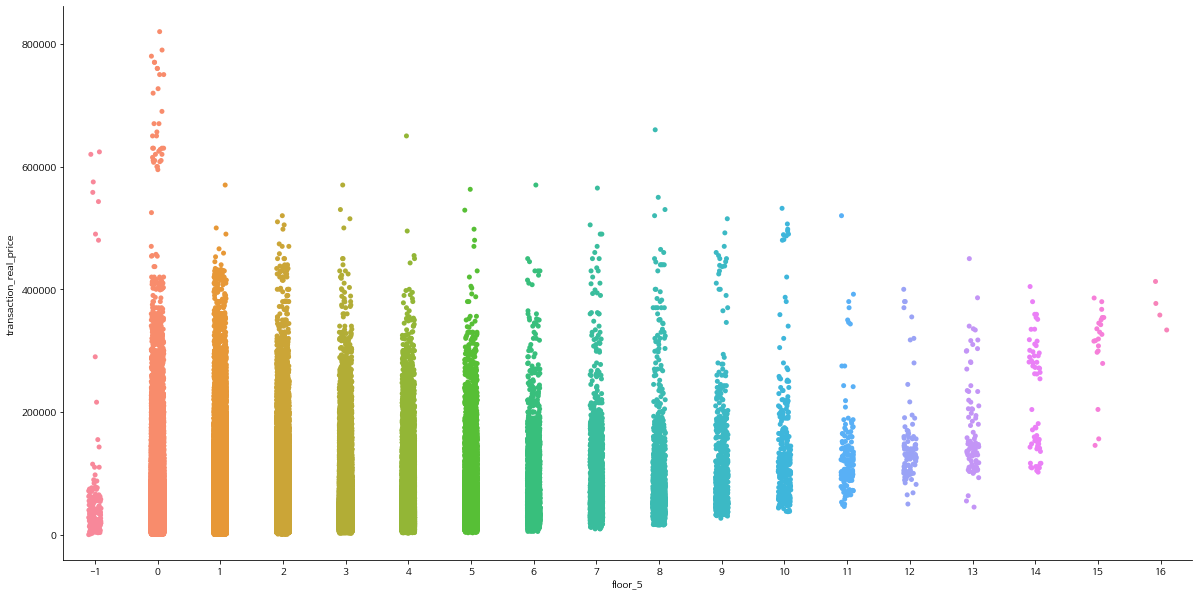

In [26]:
train['floor_5']=train['floor']//5
sns.catplot('floor_5','transaction_real_price', data=train.sample(frac=1, random_state=42))
plt.gcf().set_size_inches(20,9)
train.drop(['floor_5'], axis=1, inplace=True)

# 상관관계

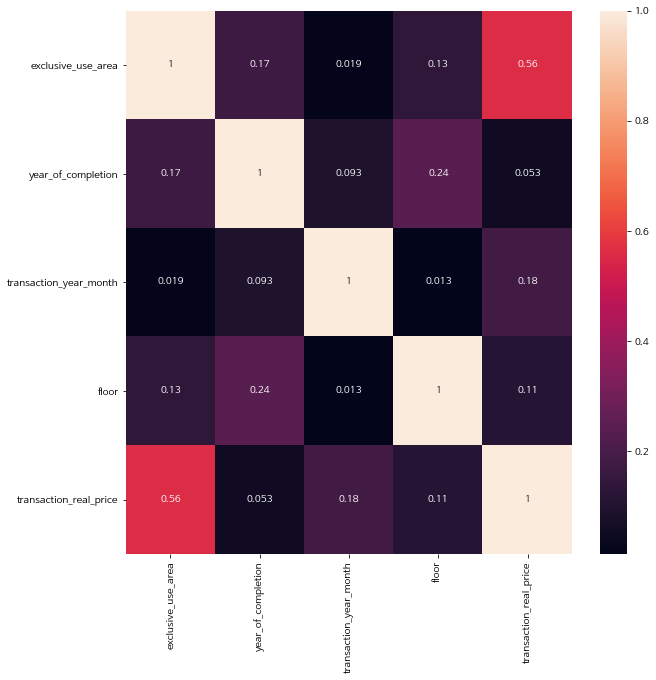

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr().iloc[1:, 1:], annot=True)
plt.show()

# 데이터 전처리
- 부산과 서울에는 겹치는 동, 지번, 등이 존재한다. 이를 구분해줘야한다.



## 일단 컬럼별로 겹치는것이 있는지 확인해본다.

In [28]:
train.columns

Index(['apartment_id', 'city', 'dong', 'jibun', 'apt', 'addr_kr',
       'exclusive_use_area', 'year_of_completion', 'transaction_year_month',
       'transaction_date', 'floor', 'transaction_real_price'],
      dtype='object')

In [29]:
for column in ['apartment_id', 'dong', 'jibun', 'apt', 'addr_kr']:
    busan_element = train[train['city']=='부산광역시'][column].unique()
    seoul_element = train[train['city']=='서울특별시'][column].unique()
    inter_element = set(busan_element)&set(seoul_element)
    print('{:15s} : {:5d} 개'.format(column, len(inter_element)))
    if len(inter_element)>0:
        print(inter_element,'\n')

apartment_id    :     0 개
dong            :     4 개
{'사직동', '중동', '송정동', '부암동'} 

jibun           :   981 개
{'168-8', '203-19', '947', '87-1', '529', '55-4', '114-1', '206', '23-3', '1281', '178-7', '192-9', '302-3', '184-3', '97-8', '360-2', '418-22', '109-4', '110-2', '497', '1057-1', '441-1', '657', '1660', '1307', '160', '239', '869', '56', '1124', '1527', '460', '1024', '9-3', '850', '20-1', '551', '338-1', '223-6', '581', '840', '802-3', '64-15', '182-4', '396-8', '426', '442-1', '101-1', '413-8', '75-1', '607', '1030', '1049', '49-8', '253', '224-2', '954', '209', '99-1', '970', '1502', '11-5', '875', '887-1', '925-1', '653', '611', '1022', '490', '412-1', '277-2', '322-1', '437', '149', '402-10', '630', '532', '740-5', '8-1', '470-2', '221-1', '46-1', '352-4', '749', '1282', '172', '407', '91-10', '65-1', '101-7', '535-7', '530-5', '123-1', '2-6', '182-1', '1298', '187-5', '53-1', '622', '885', '180-7', '777', '236-7', '420-9', '190', '39', '774', '313', '84-2', '355', '720', '

addr_kr         :     0 개


## dong, jibun, apt 에서 겹치는 것이 존재한다.
- 서로 다른 것을 의미하는 것이 같은 데이터를 가지는 것은 좋지 않다.
- 구분해준다.

In [93]:
test = pd.read_csv('test.csv')

In [94]:
# for column in ['dong', 'jibun', 'apt']:
#     busan_element = train[train['city']=='부산광역시'][column].unique()
#     seoul_element = train[train['city']=='서울특별시'][column].unique()
#     inter_element = set(busan_element)&set(seoul_element)
    
#     for element in tqdm(list(inter_element)):
#         train.loc[(train['city']=='부산광역시') & (train[column] == element), column] = '부산_{}'.format(element)
#         train.loc[(train['city']=='서울특별시') & (train[column] == element), column] = '서울_{}'.format(element)
for column in ['dong', 'jibun', 'apt']:
    busan_element = test[test['city']=='부산광역시'][column].unique()
    seoul_element = test[test['city']=='서울특별시'][column].unique()
    inter_element = set(busan_element)&set(seoul_element)
    
    for element in tqdm(list(inter_element)):
        test.loc[(test['city']=='부산광역시') & (test[column] == element), column] = '부산_{}'.format(element)
        test.loc[(test['city']=='서울특별시') & (test[column] == element), column] = '서울_{}'.format(element)
        

100%|█████████████████████████████████████████████████████████████████████████████████| 68/68 [00:00<00:00, 435.80it/s]


In [95]:
train = pd.read_csv('전처리완료.csv')

## 2주차 추가

In [96]:
park=pd.read_csv('park.csv')
day_care_center=pd.read_csv('day_care_center.csv')

In [97]:
print(park.isnull().sum()/len(park)*100,'\n\n')
print(day_care_center.isnull().sum()/len(day_care_center)*100)

city                            0.000000
gu                              0.220751
dong                            0.000000
park_name                       0.000000
park_type                       0.000000
park_area                       0.000000
park_exercise_facility         79.617366
park_entertainment_facility    67.991170
park_benefit_facility          80.426784
park_cultural_facitiy          94.701987
park_facility_other            87.122884
park_open_year                 31.052244
reference_date                  0.000000
dtype: float64 


city                     0.000000
gu                       0.000000
day_care_name            0.000000
day_care_type            0.000000
day_care_baby_num        0.000000
teacher_num              2.979738
nursing_room_num        42.365250
playground_num          51.979870
CCTV_num                30.075487
is_commuting_vehicle     6.568666
reference_date           0.000000
dtype: float64


In [98]:
park = park.drop(['park_exercise_facility', 'park_entertainment_facility', 'park_benefit_facility', 'park_cultural_facitiy','park_facility_other',
          'park_open_year'], axis=1)
day_care_center = day_care_center.drop(['nursing_room_num', 'playground_num', 'CCTV_num', 'is_commuting_vehicle'], axis=1)
day_care_center['teacher_num'] = day_care_center['teacher_num'].fillna(day_care_center['teacher_num'].mean())

In [99]:
park_dong_mean = park.groupby('dong').mean().reset_index()
day_care_gu_mean = day_care_center.groupby('gu').mean().reset_index()

In [101]:
for gu, care_baby, teacher in zip(day_care_gu_mean['gu'].values, day_care_gu_mean['day_care_baby_num'].values, day_care_gu_mean['teacher_num'].values):
    park.loc[(park['gu']==gu), 'day_care_baby_num_mean'] = care_baby
    park.loc[(park['gu']==gu), 'teacher_mean'] = teacher

In [102]:
park['day_care_baby_num_mean']  = park['day_care_baby_num_mean'].fillna(park['day_care_baby_num_mean'].mean())
park['teacher_mean']  = park['teacher_mean'].fillna(park['teacher_mean'].mean())

In [103]:
park_groupby = park.groupby(by='dong').mean().reset_index().iloc[:]

In [104]:
for dong, park_area, day_care_baby_num_mean, teacher_mean in tqdm(zip(park_groupby['dong'].values, park_groupby['park_area'].values, park_groupby['day_care_baby_num_mean'].values, park_groupby['teacher_mean'].values)):
    train.loc[train['dong']==dong, 'day_care_baby_num_mean'] = day_care_baby_num_mean
    train.loc[train['dong']==dong, 'park_area'] = park_area
    train.loc[train['dong']==dong, 'teacher_num'] = teacher_mean
    
    test.loc[train['dong']==dong, 'day_care_baby_num_mean'] = day_care_baby_num_mean
    test.loc[train['dong']==dong, 'park_area'] = park_area
    test.loc[train['dong']==dong, 'teacher_num'] = teacher_mean
    
    

237it [01:21,  2.92it/s]


In [17]:
# # 수업 때 볼 것
# np.array(['_' in k for k in train['apt'].values]).sum()+\
# np.array(['_' in k for k in train['apt'].values]).sum()+\
# np.array(['_' in k for k in train['apt'].values]).sum()

In [18]:
# train[(train['jibun']=='176-30')]['addr_kr'].value_counts()

In [19]:
# busan_dong=train[train['city']=='부산광역시']['dong'].unique()
# seoul_dong=train[train['city']=='서울특별시']['dong'].unique()
# print(list(set(busan_dong)&set(seoul_dong)))


# train.loc[(train['city']=='부산광역시') & (train['dong']=='송정동'), 'dong'] = '부산송정동'
# train.loc[(train['city']=='부산광역시') & (train['dong']=='사직동'), 'dong'] = '부산사직동'
# train.loc[(train['city']=='부산광역시') & (train['dong']=='부암동'), 'dong'] = '부산부암동'
# train.loc[(train['city']=='부산광역시') & (train['dong']=='중동'), 'dong'] = '부산중동'

# train.loc[(train['city']=='서울특별시') & (train['dong']=='송정동'), 'dong'] = '서울송정동'
# train.loc[(train['city']=='서울특별시') & (train['dong']=='사직동'), 'dong'] = '서울사직동'
# train.loc[(train['city']=='서울특별시') & (train['dong']=='부암동'), 'dong'] = '서울부암동'
# train.loc[(train['city']=='서울특별시') & (train['dong']=='중동'), 'dong'] = '서울중동'

In [123]:
from sklearn.preprocessing import LabelEncoder

In [124]:
LE = LabelEncoder()

In [125]:

LE.fit(list(train['city'])+list(test['city']))
train['city'] = LE.transform(train['city'])
test['city'] = LE.transform(test['city'])
LE.fit(list(train['dong'])+list(test['dong']))
train['dong'] = LE.transform(train['dong'])
test['dong'] = LE.transform(test['dong'])
LE.fit(list(train['jibun'])+list(test['jibun']))
train['jibun'] = LE.transform(train['jibun'])
test['jibun'] = LE.transform(test['jibun'])
LE.fit(list(train['apt'])+list(test['apt']))
train['apt'] = LE.transform(train['apt'])
test['apt'] = LE.transform(test['apt'])
LE.fit(list(train['addr_kr'])+list(test['addr_kr']))
train['addr_kr'] = LE.transform(train['addr_kr'])
test['addr_kr'] = LE.transform(test['addr_kr'])


train['year_of_completion'] = 2017-train['year_of_completion'].values
test['year_of_completion'] = 2017-test['year_of_completion'].values

train['transaction_year'] = 2017 - np.array([int(str(k)[:4]) for k in train['transaction_year_month'].values])
test['transaction_year'] = 2017 - np.array([int(str(k)[:4]) for k in test['transaction_year_month'].values])
train['transaction_month'] = np.array([int(str(k)[4:]) for k in train['transaction_year_month'].values])
test['transaction_month'] = np.array([int(str(k)[4:]) for k in test['transaction_year_month'].values])


LE.fit(list(train['transaction_year_month'])+list(test['transaction_year_month']))
train['transaction_year_month'] = LE.transform(train['transaction_year_month'])
test['transaction_year_month'] = LE.transform(test['transaction_year_month'])

LE.fit(list(train['transaction_date'])+list(test['transaction_date']))
train['transaction_date'] = LE.transform(train['transaction_date'])
test['transaction_date'] = LE.transform(test['transaction_date'])

# 2주차

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### feature 중요도 출력

In [24]:
def show_feature_importance(model, data):
    df=pd.DataFrame({'column':list(data.columns),
              'score':list(model.feature_importances_),
             })
    plt.figure(figsize=(20,10))
    sns.barplot(x="score", y="column", data=df)
    plt.yticks(size=20)
    plt.xticks(size=20)
    plt.xlabel('score', size=20)
    plt.ylabel('column', size=20)
    plt.show()

### 데이터 분리

In [273]:
# 범주형 데이터.
category_columns = ['apartment_id', 'city', 'dong', 'jibun', 'apt', 'addr_kr']

for column in category_columns:
    train[column] = train[column].astype('category')                     # 범주형시 category. (lightgbm)
    test[column] = test[column].astype('category')

In [89]:
train.columns

Index(['apartment_id', 'city', 'dong', 'jibun', 'apt', 'addr_kr',
       'exclusive_use_area', 'year_of_completion', 'transaction_year_month',
       'transaction_date', 'floor', 'transaction_real_price', 'jibun_apt',
       'day_care_baby_num_mean', 'park_area', 'teacher_num',
       'transaction_year', 'transaction_month'],
      dtype='object')

In [274]:
drop_column = ['transaction_real_price']
X_data = train.drop(drop_column, axis=1)
y_data = train['transaction_real_price'].values

In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=train['city'])

# RandomForest
- 결측값이 있으면 자동으로 대체 못함.
- 결측값을 꼭 처리 해줘야함.

In [1]:
from sklearn.ensemble import RandomForestRegressor


C:\Users\JeongMyeong\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [144]:
rf = RandomForestRegressor(
        n_estimators=100,
        criterion='mse',
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        min_impurity_decrease=0.0,
        n_jobs=-1,
        random_state=42,
        verbose=1,
)

rf.fit(X_train.iloc[:,(X_train.isnull().sum()==0).values], y_train)


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=42, verbose=1, warm_start=False)

In [145]:
print(np.sqrt(mean_squared_error(y_valid,rf.predict(X_valid.iloc[:,(X_train.isnull().sum()==0).values]))))

[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s


4029.2055504096616


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.2s finished


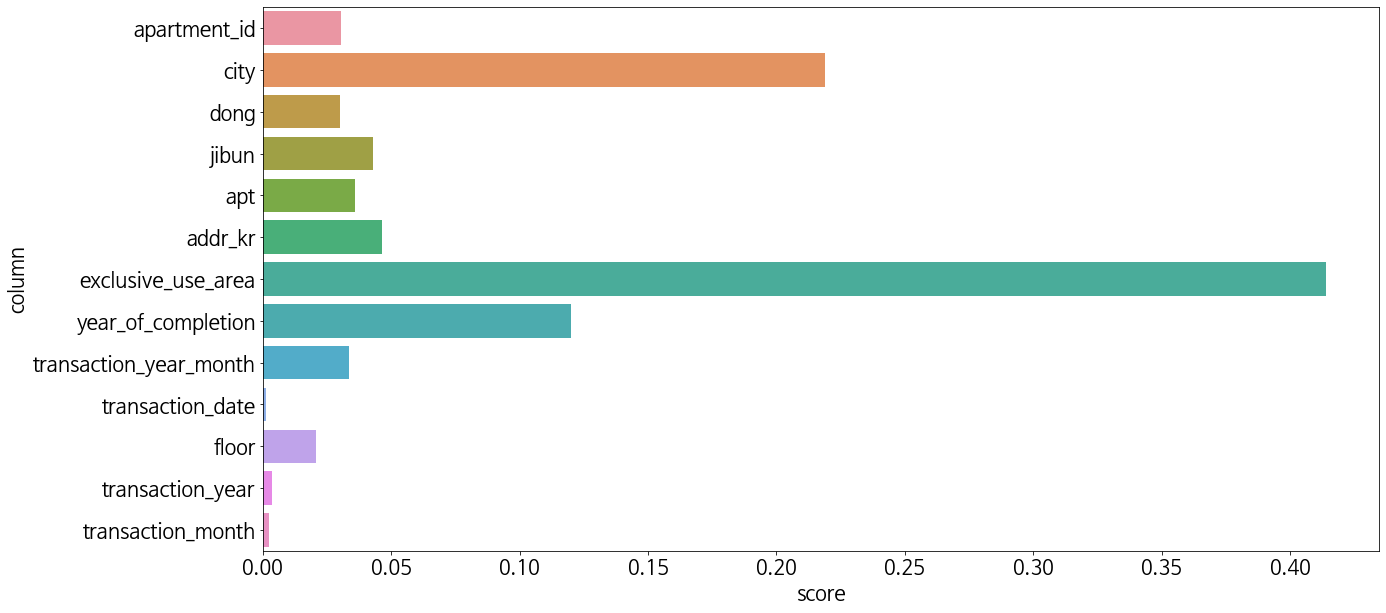

In [148]:
show_feature_importance(rf, X_train.iloc[:,(X_train.isnull().sum()==0).values])

# XGBoost

In [160]:
# pip install xgboost
import xgboost as xgb

In [162]:
xgb_model=xgb.XGBRegressor(
        max_depth=3,
        learning_rate=0.5,
        n_estimators=2000,
        verbosity=1,
        silent=1,
        objective='reg:linear',
        booster='gbtree',
        n_jobs=1,
        nthread=None,
        gamma=0,
        min_child_weight=1,
        max_delta_step=0,
        subsample=1,
        colsample_bytree=1,
        colsample_bylevel=1,
        colsample_bynode=1,
        reg_alpha=0,
        reg_lambda=1,
        scale_pos_weight=1,
        random_state=42,
        seed=42,
        missing=None,
        importance_type='gain',
)

In [31]:
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_valid, y_valid)], eval_metric='rmse',
             early_stopping_rounds=50)

[0]	validation_0-rmse:30504.3	validation_1-rmse:30527.1
[1]	validation_0-rmse:22218.3	validation_1-rmse:22244.6
[2]	validation_0-rmse:18819.4	validation_1-rmse:18841.2
[3]	validation_0-rmse:17198.8	validation_1-rmse:17225.3
[4]	validation_0-rmse:16306.8	validation_1-rmse:16322.9
[5]	validation_0-rmse:15391.6	validation_1-rmse:15402.8
[6]	validation_0-rmse:14930.2	validation_1-rmse:14982.9
[7]	validation_0-rmse:14645.9	validation_1-rmse:14699.2
[8]	validation_0-rmse:14329.8	validation_1-rmse:14379.1
[9]	validation_0-rmse:14147.5	validation_1-rmse:14198
[10]	validation_0-rmse:14010	validation_1-rmse:14062.5
[11]	validation_0-rmse:13858.2	validation_1-rmse:13914.9
[12]	validation_0-rmse:13707	validation_1-rmse:13770.8
[13]	validation_0-rmse:13466.6	validation_1-rmse:13513.7
[14]	validation_0-rmse:13298.9	validation_1-rmse:13347.1
[15]	validation_0-rmse:12997.8	validation_1-rmse:13046.2
[16]	validation_0-rmse:12797.1	validation_1-rmse:12841.7
[17]	validation_0-rmse:12641.8	validation_1-rms

[144]	validation_0-rmse:8509.15	validation_1-rmse:8670.79
[145]	validation_0-rmse:8499.91	validation_1-rmse:8661.71
[146]	validation_0-rmse:8461.02	validation_1-rmse:8622.28
[147]	validation_0-rmse:8458.26	validation_1-rmse:8618.59
[148]	validation_0-rmse:8447.81	validation_1-rmse:8608.68
[149]	validation_0-rmse:8442.93	validation_1-rmse:8604.43
[150]	validation_0-rmse:8423.04	validation_1-rmse:8583.59
[151]	validation_0-rmse:8404.41	validation_1-rmse:8564.59
[152]	validation_0-rmse:8385.03	validation_1-rmse:8548.42
[153]	validation_0-rmse:8377.1	validation_1-rmse:8540.14
[154]	validation_0-rmse:8367.46	validation_1-rmse:8529.71
[155]	validation_0-rmse:8361.19	validation_1-rmse:8522.58
[156]	validation_0-rmse:8345.6	validation_1-rmse:8507.71
[157]	validation_0-rmse:8330.61	validation_1-rmse:8494.12
[158]	validation_0-rmse:8296.48	validation_1-rmse:8457.39
[159]	validation_0-rmse:8277.2	validation_1-rmse:8439.29
[160]	validation_0-rmse:8239.99	validation_1-rmse:8406.35
[161]	validation_

[286]	validation_0-rmse:7120.05	validation_1-rmse:7306.42
[287]	validation_0-rmse:7117.56	validation_1-rmse:7307.38
[288]	validation_0-rmse:7110.93	validation_1-rmse:7302.43
[289]	validation_0-rmse:7103.38	validation_1-rmse:7295.11
[290]	validation_0-rmse:7100.15	validation_1-rmse:7292.48
[291]	validation_0-rmse:7096.93	validation_1-rmse:7290.06
[292]	validation_0-rmse:7089.94	validation_1-rmse:7285.17
[293]	validation_0-rmse:7079.75	validation_1-rmse:7270.6
[294]	validation_0-rmse:7075.22	validation_1-rmse:7266.29
[295]	validation_0-rmse:7071.85	validation_1-rmse:7262.39
[296]	validation_0-rmse:7066.55	validation_1-rmse:7259.52
[297]	validation_0-rmse:7063.49	validation_1-rmse:7256.44
[298]	validation_0-rmse:7046.66	validation_1-rmse:7240.32
[299]	validation_0-rmse:7040.88	validation_1-rmse:7234.8
[300]	validation_0-rmse:7036.18	validation_1-rmse:7230.85
[301]	validation_0-rmse:7028.21	validation_1-rmse:7222.48
[302]	validation_0-rmse:7022.36	validation_1-rmse:7217.85
[303]	validation

[428]	validation_0-rmse:6444.88	validation_1-rmse:6661.1
[429]	validation_0-rmse:6439.73	validation_1-rmse:6656.73
[430]	validation_0-rmse:6435.99	validation_1-rmse:6653.39
[431]	validation_0-rmse:6433.35	validation_1-rmse:6651.83
[432]	validation_0-rmse:6425.97	validation_1-rmse:6645.47
[433]	validation_0-rmse:6408.58	validation_1-rmse:6629.34
[434]	validation_0-rmse:6402.68	validation_1-rmse:6622.75
[435]	validation_0-rmse:6400.21	validation_1-rmse:6620.46
[436]	validation_0-rmse:6396.62	validation_1-rmse:6617.3
[437]	validation_0-rmse:6389.98	validation_1-rmse:6609.76
[438]	validation_0-rmse:6380.69	validation_1-rmse:6600.56
[439]	validation_0-rmse:6373.44	validation_1-rmse:6595.15
[440]	validation_0-rmse:6366.33	validation_1-rmse:6588.49
[441]	validation_0-rmse:6362.66	validation_1-rmse:6585.82
[442]	validation_0-rmse:6359.52	validation_1-rmse:6581.89
[443]	validation_0-rmse:6352.58	validation_1-rmse:6576.13
[444]	validation_0-rmse:6350.26	validation_1-rmse:6573.85
[445]	validation

[570]	validation_0-rmse:5919.58	validation_1-rmse:6147.58
[571]	validation_0-rmse:5917.09	validation_1-rmse:6145.37
[572]	validation_0-rmse:5914.69	validation_1-rmse:6143.04
[573]	validation_0-rmse:5910.05	validation_1-rmse:6138.96
[574]	validation_0-rmse:5908.6	validation_1-rmse:6137.86
[575]	validation_0-rmse:5906.2	validation_1-rmse:6135.82
[576]	validation_0-rmse:5904.44	validation_1-rmse:6134.15
[577]	validation_0-rmse:5901.88	validation_1-rmse:6131.19
[578]	validation_0-rmse:5900.37	validation_1-rmse:6129.78
[579]	validation_0-rmse:5897.07	validation_1-rmse:6126.56
[580]	validation_0-rmse:5896.28	validation_1-rmse:6125.8
[581]	validation_0-rmse:5893.03	validation_1-rmse:6122.52
[582]	validation_0-rmse:5890.54	validation_1-rmse:6120.17
[583]	validation_0-rmse:5888.58	validation_1-rmse:6114.78
[584]	validation_0-rmse:5886.14	validation_1-rmse:6112.6
[585]	validation_0-rmse:5880.88	validation_1-rmse:6106.71
[586]	validation_0-rmse:5878	validation_1-rmse:6104.2
[587]	validation_0-rms

[712]	validation_0-rmse:5586.86	validation_1-rmse:5848.63
[713]	validation_0-rmse:5584.95	validation_1-rmse:5846.59
[714]	validation_0-rmse:5583.56	validation_1-rmse:5845.19
[715]	validation_0-rmse:5582.94	validation_1-rmse:5844.39
[716]	validation_0-rmse:5580.36	validation_1-rmse:5842.37
[717]	validation_0-rmse:5579.61	validation_1-rmse:5841.69
[718]	validation_0-rmse:5578.1	validation_1-rmse:5840.04
[719]	validation_0-rmse:5575.4	validation_1-rmse:5837.36
[720]	validation_0-rmse:5574.39	validation_1-rmse:5836.86
[721]	validation_0-rmse:5572.59	validation_1-rmse:5834.7
[722]	validation_0-rmse:5569.59	validation_1-rmse:5831.47
[723]	validation_0-rmse:5567.55	validation_1-rmse:5829.35
[724]	validation_0-rmse:5564.37	validation_1-rmse:5826.33
[725]	validation_0-rmse:5563.36	validation_1-rmse:5825.46
[726]	validation_0-rmse:5561.33	validation_1-rmse:5823.58
[727]	validation_0-rmse:5559.6	validation_1-rmse:5821.25
[728]	validation_0-rmse:5555.49	validation_1-rmse:5817.35
[729]	validation_0

[854]	validation_0-rmse:5331.12	validation_1-rmse:5625.05
[855]	validation_0-rmse:5330.46	validation_1-rmse:5624.43
[856]	validation_0-rmse:5329.74	validation_1-rmse:5623.77
[857]	validation_0-rmse:5328.36	validation_1-rmse:5622.67
[858]	validation_0-rmse:5327.74	validation_1-rmse:5622.1
[859]	validation_0-rmse:5326.48	validation_1-rmse:5620.6
[860]	validation_0-rmse:5323.81	validation_1-rmse:5618.54
[861]	validation_0-rmse:5319.28	validation_1-rmse:5614.47
[862]	validation_0-rmse:5317.2	validation_1-rmse:5613.51
[863]	validation_0-rmse:5315.21	validation_1-rmse:5612.9
[864]	validation_0-rmse:5313.87	validation_1-rmse:5611.66
[865]	validation_0-rmse:5312.58	validation_1-rmse:5610.65
[866]	validation_0-rmse:5311.92	validation_1-rmse:5609.87
[867]	validation_0-rmse:5311.15	validation_1-rmse:5609.32
[868]	validation_0-rmse:5311	validation_1-rmse:5609.22
[869]	validation_0-rmse:5308.58	validation_1-rmse:5606.84
[870]	validation_0-rmse:5307.18	validation_1-rmse:5606.65
[871]	validation_0-rm

[996]	validation_0-rmse:5102.06	validation_1-rmse:5426.89
[997]	validation_0-rmse:5097.39	validation_1-rmse:5421.86
[998]	validation_0-rmse:5095.84	validation_1-rmse:5420.43
[999]	validation_0-rmse:5095.02	validation_1-rmse:5419.56
[1000]	validation_0-rmse:5094.58	validation_1-rmse:5419.28
[1001]	validation_0-rmse:5092.91	validation_1-rmse:5417.57
[1002]	validation_0-rmse:5090.84	validation_1-rmse:5415.56
[1003]	validation_0-rmse:5085.07	validation_1-rmse:5410.52
[1004]	validation_0-rmse:5083.73	validation_1-rmse:5409.31
[1005]	validation_0-rmse:5080.26	validation_1-rmse:5406.1
[1006]	validation_0-rmse:5079.43	validation_1-rmse:5405.2
[1007]	validation_0-rmse:5077.74	validation_1-rmse:5403.13
[1008]	validation_0-rmse:5076.07	validation_1-rmse:5404.27
[1009]	validation_0-rmse:5075.14	validation_1-rmse:5403.65
[1010]	validation_0-rmse:5074.06	validation_1-rmse:5402.77
[1011]	validation_0-rmse:5071.19	validation_1-rmse:5398.89
[1012]	validation_0-rmse:5069.44	validation_1-rmse:5397.4
[101

[1136]	validation_0-rmse:4911.64	validation_1-rmse:5252.88
[1137]	validation_0-rmse:4910.66	validation_1-rmse:5252.55
[1138]	validation_0-rmse:4909.63	validation_1-rmse:5251.87
[1139]	validation_0-rmse:4908.33	validation_1-rmse:5250.72
[1140]	validation_0-rmse:4906.59	validation_1-rmse:5248.61
[1141]	validation_0-rmse:4904.48	validation_1-rmse:5246.89
[1142]	validation_0-rmse:4903.83	validation_1-rmse:5246.22
[1143]	validation_0-rmse:4903.08	validation_1-rmse:5245.24
[1144]	validation_0-rmse:4902.23	validation_1-rmse:5244.47
[1145]	validation_0-rmse:4901.48	validation_1-rmse:5244.34
[1146]	validation_0-rmse:4900.11	validation_1-rmse:5242.73
[1147]	validation_0-rmse:4899.4	validation_1-rmse:5242.18
[1148]	validation_0-rmse:4898.4	validation_1-rmse:5241.52
[1149]	validation_0-rmse:4897.45	validation_1-rmse:5240.8
[1150]	validation_0-rmse:4894.99	validation_1-rmse:5237.96
[1151]	validation_0-rmse:4894.68	validation_1-rmse:5238.2
[1152]	validation_0-rmse:4893.64	validation_1-rmse:5237.13
[

[1276]	validation_0-rmse:4760.83	validation_1-rmse:5116.68
[1277]	validation_0-rmse:4759.97	validation_1-rmse:5115.94
[1278]	validation_0-rmse:4758.8	validation_1-rmse:5114.89
[1279]	validation_0-rmse:4756.67	validation_1-rmse:5113.12
[1280]	validation_0-rmse:4753.25	validation_1-rmse:5109.63
[1281]	validation_0-rmse:4752.43	validation_1-rmse:5109.61
[1282]	validation_0-rmse:4751.69	validation_1-rmse:5109.03
[1283]	validation_0-rmse:4750.43	validation_1-rmse:5107.94
[1284]	validation_0-rmse:4749.64	validation_1-rmse:5107.31
[1285]	validation_0-rmse:4748.97	validation_1-rmse:5106.7
[1286]	validation_0-rmse:4747.65	validation_1-rmse:5105.52
[1287]	validation_0-rmse:4746.58	validation_1-rmse:5104.32
[1288]	validation_0-rmse:4746.37	validation_1-rmse:5104
[1289]	validation_0-rmse:4745.96	validation_1-rmse:5103.8
[1290]	validation_0-rmse:4745.58	validation_1-rmse:5102.16
[1291]	validation_0-rmse:4745.49	validation_1-rmse:5103.36
[1292]	validation_0-rmse:4744.21	validation_1-rmse:5102.19
[12

[1416]	validation_0-rmse:4631.92	validation_1-rmse:5007.46
[1417]	validation_0-rmse:4631.03	validation_1-rmse:5006.73
[1418]	validation_0-rmse:4630.25	validation_1-rmse:5005.73
[1419]	validation_0-rmse:4628.91	validation_1-rmse:5004.45
[1420]	validation_0-rmse:4626.86	validation_1-rmse:5001.93
[1421]	validation_0-rmse:4626.25	validation_1-rmse:5001.16
[1422]	validation_0-rmse:4625.13	validation_1-rmse:4999.82
[1423]	validation_0-rmse:4624.44	validation_1-rmse:5000.03
[1424]	validation_0-rmse:4623.34	validation_1-rmse:4999.4
[1425]	validation_0-rmse:4622.48	validation_1-rmse:4998.79
[1426]	validation_0-rmse:4621.67	validation_1-rmse:4998.25
[1427]	validation_0-rmse:4621.03	validation_1-rmse:4997.96
[1428]	validation_0-rmse:4620.16	validation_1-rmse:4997.52
[1429]	validation_0-rmse:4619.57	validation_1-rmse:4996.98
[1430]	validation_0-rmse:4618.32	validation_1-rmse:4996.8
[1431]	validation_0-rmse:4617.32	validation_1-rmse:4995.93
[1432]	validation_0-rmse:4615.97	validation_1-rmse:4995.13

[1556]	validation_0-rmse:4515.45	validation_1-rmse:4911.91
[1557]	validation_0-rmse:4514.33	validation_1-rmse:4910.58
[1558]	validation_0-rmse:4513.51	validation_1-rmse:4909.86
[1559]	validation_0-rmse:4513.07	validation_1-rmse:4909.22
[1560]	validation_0-rmse:4512.6	validation_1-rmse:4908.92
[1561]	validation_0-rmse:4511.56	validation_1-rmse:4907.93
[1562]	validation_0-rmse:4510.33	validation_1-rmse:4906.63
[1563]	validation_0-rmse:4509.82	validation_1-rmse:4906.28
[1564]	validation_0-rmse:4509.34	validation_1-rmse:4905.81
[1565]	validation_0-rmse:4509.01	validation_1-rmse:4905.54
[1566]	validation_0-rmse:4508.3	validation_1-rmse:4904.74
[1567]	validation_0-rmse:4507.51	validation_1-rmse:4903.89
[1568]	validation_0-rmse:4506.65	validation_1-rmse:4903.27
[1569]	validation_0-rmse:4505.61	validation_1-rmse:4902.15
[1570]	validation_0-rmse:4504.88	validation_1-rmse:4901.46
[1571]	validation_0-rmse:4504.03	validation_1-rmse:4900.63
[1572]	validation_0-rmse:4503.67	validation_1-rmse:4900.41

[1696]	validation_0-rmse:4411.42	validation_1-rmse:4826.87
[1697]	validation_0-rmse:4411.3	validation_1-rmse:4826.76
[1698]	validation_0-rmse:4410.04	validation_1-rmse:4825.89
[1699]	validation_0-rmse:4409.59	validation_1-rmse:4825.62
[1700]	validation_0-rmse:4408.77	validation_1-rmse:4824.98
[1701]	validation_0-rmse:4408.62	validation_1-rmse:4824.93
[1702]	validation_0-rmse:4407.7	validation_1-rmse:4824.38
[1703]	validation_0-rmse:4406.34	validation_1-rmse:4823.04
[1704]	validation_0-rmse:4405.32	validation_1-rmse:4821.61
[1705]	validation_0-rmse:4404.92	validation_1-rmse:4821.53
[1706]	validation_0-rmse:4404.29	validation_1-rmse:4820.81
[1707]	validation_0-rmse:4403.88	validation_1-rmse:4820.6
[1708]	validation_0-rmse:4403.36	validation_1-rmse:4819.99
[1709]	validation_0-rmse:4402.84	validation_1-rmse:4819.47
[1710]	validation_0-rmse:4402.47	validation_1-rmse:4819.12
[1711]	validation_0-rmse:4402.34	validation_1-rmse:4818.94
[1712]	validation_0-rmse:4401.57	validation_1-rmse:4818.21


[1836]	validation_0-rmse:4310.96	validation_1-rmse:4741.86
[1837]	validation_0-rmse:4310.07	validation_1-rmse:4741.17
[1838]	validation_0-rmse:4309.9	validation_1-rmse:4741.02
[1839]	validation_0-rmse:4308.57	validation_1-rmse:4739.88
[1840]	validation_0-rmse:4307.95	validation_1-rmse:4739.86
[1841]	validation_0-rmse:4307.42	validation_1-rmse:4739.45
[1842]	validation_0-rmse:4306.74	validation_1-rmse:4739.08
[1843]	validation_0-rmse:4306	validation_1-rmse:4738.56
[1844]	validation_0-rmse:4305.73	validation_1-rmse:4738.3
[1845]	validation_0-rmse:4304.86	validation_1-rmse:4737.75
[1846]	validation_0-rmse:4304.03	validation_1-rmse:4737.49
[1847]	validation_0-rmse:4302.48	validation_1-rmse:4737.52
[1848]	validation_0-rmse:4302.38	validation_1-rmse:4737.43
[1849]	validation_0-rmse:4301.66	validation_1-rmse:4736.75
[1850]	validation_0-rmse:4301.26	validation_1-rmse:4736.45
[1851]	validation_0-rmse:4300.52	validation_1-rmse:4735.95
[1852]	validation_0-rmse:4299.9	validation_1-rmse:4735.75
[18

[1976]	validation_0-rmse:4233.22	validation_1-rmse:4680.92
[1977]	validation_0-rmse:4232.34	validation_1-rmse:4680.29
[1978]	validation_0-rmse:4231.94	validation_1-rmse:4679.92
[1979]	validation_0-rmse:4231.01	validation_1-rmse:4679.01
[1980]	validation_0-rmse:4230.44	validation_1-rmse:4678.57
[1981]	validation_0-rmse:4229.97	validation_1-rmse:4677.94
[1982]	validation_0-rmse:4229.58	validation_1-rmse:4677.58
[1983]	validation_0-rmse:4228.91	validation_1-rmse:4677.1
[1984]	validation_0-rmse:4228.31	validation_1-rmse:4676.55
[1985]	validation_0-rmse:4227.86	validation_1-rmse:4675.87
[1986]	validation_0-rmse:4226.57	validation_1-rmse:4674.96
[1987]	validation_0-rmse:4226.16	validation_1-rmse:4674.53
[1988]	validation_0-rmse:4225.49	validation_1-rmse:4674.12
[1989]	validation_0-rmse:4224.84	validation_1-rmse:4674.19
[1990]	validation_0-rmse:4224.33	validation_1-rmse:4673.42
[1991]	validation_0-rmse:4224.2	validation_1-rmse:4672.97
[1992]	validation_0-rmse:4223.74	validation_1-rmse:4672.34

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.5, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=1,
       subsample=1, verbosity=1)

In [163]:
import pickle
with open('xgb_model.rb', 'rb') as f:
    xgb_model = pickle.load(f)

[20:28:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


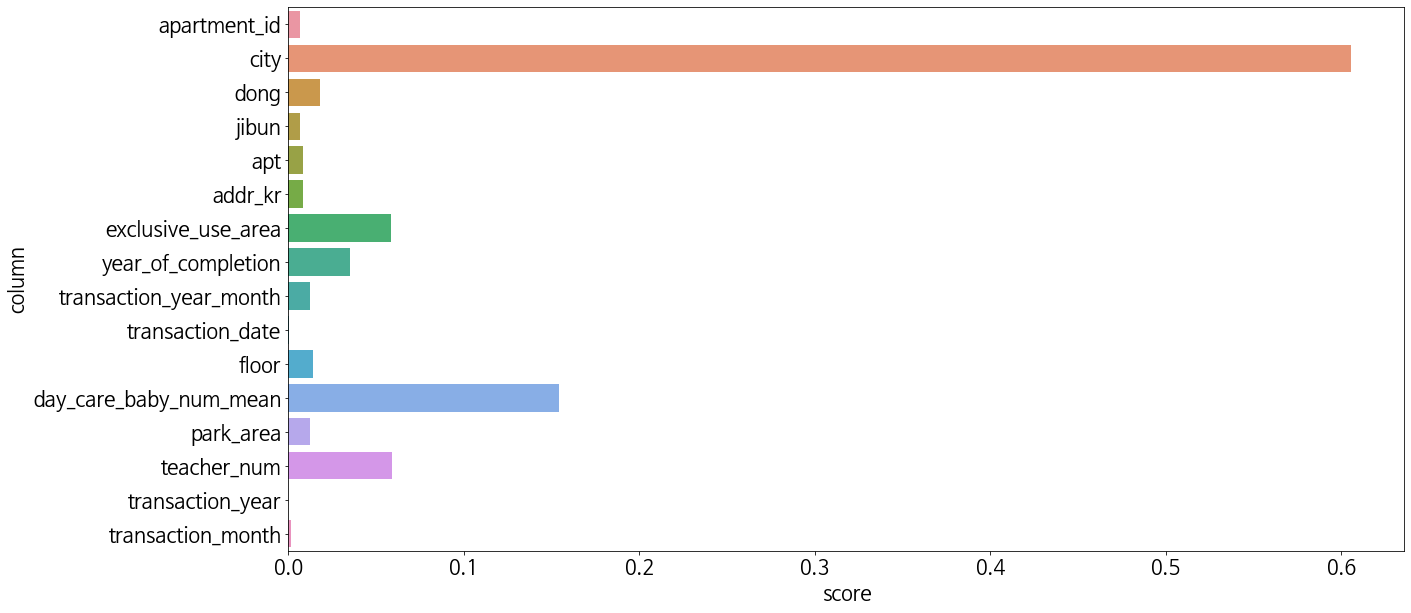

In [165]:
show_feature_importance(xgb_model, X_valid)

# LightGBM


In [166]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [167]:
from lightgbm import LGBMRegressor

In [168]:
lgbm_model = LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=20000,
    objective='regression',
    subsample=1.0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=42,
    n_jobs=-1,
#         max_bin=2*9
)


In [36]:
lgbm_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], 
               eval_metric='rmse', verbose=200,
              early_stopping_rounds=200)

Training until validation scores don't improve for 200 rounds
[200]	training's rmse: 6929.12	training's l2: 4.80127e+07	valid_1's rmse: 7023.2	valid_1's l2: 4.93254e+07
[400]	training's rmse: 5824.11	training's l2: 3.39202e+07	valid_1's rmse: 5969.14	valid_1's l2: 3.56306e+07
[600]	training's rmse: 5248.7	training's l2: 2.75489e+07	valid_1's rmse: 5457.02	valid_1's l2: 2.97791e+07
[800]	training's rmse: 4846.04	training's l2: 2.34841e+07	valid_1's rmse: 5114.55	valid_1's l2: 2.61586e+07
[1000]	training's rmse: 4560.88	training's l2: 2.08017e+07	valid_1's rmse: 4883.02	valid_1's l2: 2.38439e+07
[1200]	training's rmse: 4345.41	training's l2: 1.88826e+07	valid_1's rmse: 4713.24	valid_1's l2: 2.22147e+07
[1400]	training's rmse: 4165.51	training's l2: 1.73515e+07	valid_1's rmse: 4578.92	valid_1's l2: 2.09665e+07
[1600]	training's rmse: 4021.46	training's l2: 1.61722e+07	valid_1's rmse: 4471.76	valid_1's l2: 1.99966e+07
[1800]	training's rmse: 3899.78	training's l2: 1.52083e+07	valid_1's rms

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=20000, n_jobs=-1, num_leaves=31, objective=None,
       random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [170]:
import pickle
with open('lgbm_model.rb', 'rb') as f:
    lgbm_model = pickle.load(f)

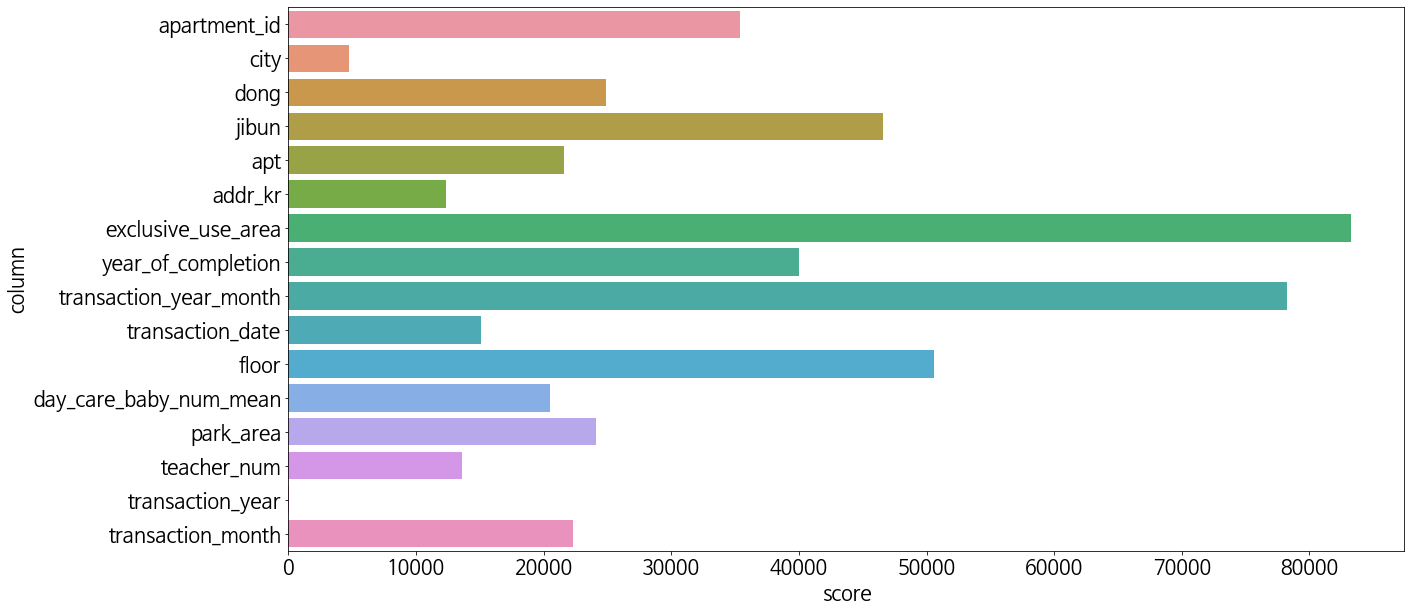

In [151]:
show_feature_importance(lgbm_model, X_valid)

In [ ]:
LGBM , XGB CATBOOST, RF , RIDGE, LASSO

In [172]:
lgbm_model.predict(X_valid)

array([29164.22309072, 37200.35878934, 16474.55573652, ...,
       18507.43233948,  9985.18799547, 50407.83908993])

In [173]:
y_valid

array([30700, 37700, 17500, ..., 18000,  9500, 49500], dtype=int64)

# 신경망

In [175]:
import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [174]:
train

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,day_care_baby_num_mean,park_area,teacher_num,transaction_year,transaction_month
0,7622,1,262,5963,6819,7311,84.8200,15,0,5,2,37500,NaN,NaN,NaN,9,1
1,5399,1,441,1401,4748,11733,99.1700,44,0,1,6,20000,NaN,NaN,NaN,9,1
2,3578,1,441,9696,2948,11734,84.7400,10,0,1,6,38500,NaN,NaN,NaN,9,1
3,10957,1,68,8203,9557,2502,146.3900,14,0,0,15,118000,NaN,NaN,NaN,9,1
4,10639,1,68,501,9304,2497,194.4300,13,0,5,3,120000,NaN,NaN,NaN,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216548,9578,0,387,1329,8452,10607,59.8245,5,118,0,3,22000,NaN,NaN,NaN,0,11
1216549,9578,0,387,1329,8452,10607,84.9923,5,118,4,7,30750,NaN,NaN,NaN,0,11
1216550,9578,0,387,1329,8452,10607,84.9923,5,118,4,9,29500,NaN,NaN,NaN,0,11
1216551,9586,0,387,1275,8459,10606,101.7400,9,118,4,7,26700,NaN,NaN,NaN,0,11


In [176]:
feature_columns = []

for numeric_col in ['exclusive_use_area', 'year_of_completion', 'floor', 'transaction_year']:
    feature_columns.append(feature_column.numeric_column(numeric_col))

In [181]:
for col in ['apartment_id', 'city', 'dong', 'jibun', 'apt', 'addr_kr']:
    cat = feature_column.categorical_column_with_vocabulary_list(
          col, train[col].unique())
    cat_one_hot = feature_column.indicator_column(cat)

    
    dim=8
    if col=='city':
        dim=2
    embedding = feature_column.embedding_column(cat, dimension=dim)
    feature_columns.append(cat_one_hot)
    feature_columns.append(embedding)


In [184]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [185]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(64, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation='linear')
])

In [189]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('transaction_real_price')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

In [190]:
TRAIN, VALID = train_test_split(train, random_state=42, test_size=0.2)

In [191]:
train_ds = df_to_dataset(TRAIN.loc[:,['exclusive_use_area', 'year_of_completion', 'floor', 'transaction_year',
            'transaction_real_price', 'apartment_id', 'city', 'dong', 'jibun', 'apt', 'addr_kr']], batch_size=1024)
val_ds=df_to_dataset(VALID.loc[:,['exclusive_use_area', 'year_of_completion', 'floor', 'transaction_year',
            'transaction_real_price', 'apartment_id', 'city', 'dong', 'jibun', 'apt', 'addr_kr']], batch_size=1024)

In [192]:
epochs=50
# decay_st = (len(TRAIN)//1024+1)*epochs
# poly_sche = tf.keras.optimizers.schedules.PolynomialDecay(1e-3, decay_st, end_learning_rate=1e-6, power=0.9)
# opt = tf.keras.optimizers.Adam(poly_sche)
model.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [66]:


history1=model.fit(train_ds,
          validation_data=val_ds,
          epochs=epochs)

Train for 951 steps, validate for 238 steps
Epoch 1/50
951/951 [==============================] - 33s 35ms/step - loss: 1014397563.7117 - root_mean_squared_error: 31855.5039 - val_loss: 311596200.8067 - val_root_mean_squared_error: 17658.4141
Epoch 2/50
951/951 [==============================] - 26s 28ms/step - loss: 185741878.4936 - root_mean_squared_error: 13628.0049 - val_loss: 128605108.3193 - val_root_mean_squared_error: 11341.2246
Epoch 3/50
951/951 [==============================] - 27s 29ms/step - loss: 113313058.1397 - root_mean_squared_error: 10643.0664 - val_loss: 101732678.9580 - val_root_mean_squared_error: 10086.3164
Epoch 4/50
951/951 [==============================] - 27s 28ms/step - loss: 95221131.3072 - root_mean_squared_error: 9758.9189 - val_loss: 89636602.0504 - val_root_mean_squared_error: 9469.0498
Epoch 5/50
951/951 [==============================] - 27s 29ms/step - loss: 84587159.0635 - root_mean_squared_error: 9197.3516 - val_loss: 80657389.5798 - val_root_mea

KeyboardInterrupt: 

In [ ]:
model.compile(optimizer=opt,
              loss='mse',
             metrics=[tf.keras.metrics.RootMeanSquaredError()])

history2= model.fit(train_ds,
          validation_data=val_ds,
          epochs=100)

In [238]:
model.compile(optimizer='adam',
              loss='mse')

model.fit(train_ds,
          validation_data=val_ds,
          epochs=100)

Train for 951 steps, validate for 238 steps
Epoch 1/100
951/951 [==============================] - 20s 22ms/step - loss: 538846304.2172 - val_loss: 83622165.4118
Epoch 2/100
951/951 [==============================] - 19s 20ms/step - loss: 55669454.8970 - val_loss: 39861583.1933
Epoch 3/100
951/951 [==============================] - 19s 20ms/step - loss: 35483680.7066 - val_loss: 35234912.4286
Epoch 4/100
951/951 [==============================] - 19s 20ms/step - loss: 29979105.1168 - val_loss: 27578078.1471
Epoch 5/100
951/951 [==============================] - 19s 20ms/step - loss: 27196385.0332 - val_loss: 26719846.8025
Epoch 6/100
951/951 [==============================] - 19s 20ms/step - loss: 25792173.4028 - val_loss: 24100758.8529
Epoch 7/100
951/951 [==============================] - 19s 20ms/step - loss: 24448474.0117 - val_loss: 29255760.6176
Epoch 8/100
951/951 [==============================] - 21s 22ms/step - loss: 23865953.6278 - val_loss: 24216449.4076
Epoch 9/100
951/951

In [303]:
tf.keras.metrics.RootMeanSquaredError()

In [ ]:
model.compile(optimizer=opt,
              loss='mse',
             metrics=[tf.keras.metrics.RootMeanSquaredError()])

history1= model.fit(train_ds,
          validation_data=val_ds,
          epochs=100)

Train for 951 steps, validate for 238 steps
Epoch 1/100
951/951 [==============================] - 30s 31ms/step - loss: 271841479.8837 - root_mean_squared_error: 16491.6660 - val_loss: 76014011.6975 - val_root_mean_squared_error: 8715.3818
Epoch 2/100
951/951 [==============================] - 28s 30ms/step - loss: 69067628.3597 - root_mean_squared_error: 8311.9980 - val_loss: 62751208.5966 - val_root_mean_squared_error: 7923.9414
Epoch 3/100
951/951 [==============================] - 28s 30ms/step - loss: 58728708.5220 - root_mean_squared_error: 7664.1655 - val_loss: 54398494.9496 - val_root_mean_squared_error: 7371.4785
Epoch 4/100
951/951 [==============================] - 28s 30ms/step - loss: 51432034.9584 - root_mean_squared_error: 7171.9424 - val_loss: 48269784.4454 - val_root_mean_squared_error: 6947.3325
Epoch 5/100
951/951 [==============================] - 28s 29ms/step - loss: 46496285.4157 - root_mean_squared_error: 6819.0684 - val_loss: 44167623.2773 - val_root_mean_squa

# 3주차

## Stratified KFold
- 계층적 KFold를 통해 원하는 데이터의 분포를 비슷하게 분리할 수 있다.
- 한 번 분리하여 사용하는 것 보다 여러번 분리하여 훈련시킨 모델을 앙상블 하면 좋은 성능을 얻을 수 있다.
- 모델의 성능이 좋아지는 것이 아니라 여러 분포로 학습시킨 모델의 예측 값을 통해 새로운 데이터에서도 좋은 성능을 기대할 수 있다.

In [275]:
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMRegressor

In [276]:
train.head()

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,day_care_baby_num_mean,park_area,teacher_num,transaction_year,transaction_month
0,7622,1,262,5963,6819,7311,84.82,15,0,5,2,37500,NaN,NaN,NaN,9,1
1,5399,1,441,1401,4748,11733,99.17,44,0,1,6,20000,NaN,NaN,NaN,9,1
2,3578,1,441,9696,2948,11734,84.74,10,0,1,6,38500,NaN,NaN,NaN,9,1
3,10957,1,68,8203,9557,2502,146.39,14,0,0,15,118000,NaN,NaN,NaN,9,1
4,10639,1,68,501,9304,2497,194.43,13,0,5,3,120000,NaN,NaN,NaN,9,1


### test 데이터에 day_care_baby_num_mean, park_area, teacher_num의 결측값이 다수 존재하기 때문에 test 데이터 예측시 좋지 않은 결과를 보임. transaction_year의 경우 importance score의 결과가 매우 낮음.

In [278]:
drop_column = ['transaction_real_price', 'day_care_baby_num_mean', 'park_area', 'teacher_num','transaction_year']
X_data = train.drop(drop_column, axis=1)
y_data = train['transaction_real_price'].values

In [239]:


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

folds=[]
for train_idx, valid_idx in skf.split(X_data, y_data//100):
    folds.append((train_idx, valid_idx))
    

In [240]:
fold=0
train_idx = folds[fold][0]
valid_idx = folds[fold][1]

In [241]:
train_idx = folds[fold][0]
valid_idx = folds[fold][1]
X_train, y_train = X_data.iloc[train_idx], y_data[train_idx]
X_valid, y_valid = X_data.iloc[valid_idx], y_data[valid_idx]


In [242]:
lgbm_model = LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=20000,
    objective='mse',
    subsample=1.0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=42,
    n_jobs=-1,
#         max_bin=2*9
)

In [243]:
models={}
for fold in range(5):
    lgbm_model = LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=20000,
    objective='mse',
    subsample=1.0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=42,
    n_jobs=-1,
#         max_bin=2*9
)
    
    # 데이터 분리 설정
    train_idx = folds[fold][0]
    valid_idx = folds[fold][1]
    X_train, y_train = X_data.iloc[train_idx], y_data[train_idx]
    X_valid, y_valid = X_data.iloc[valid_idx], y_data[valid_idx]

    
    lgbm_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], 
                   eval_metric='rmse', verbose=200,
                  early_stopping_rounds=200)
    
    # 모델 저장
    models[fold] = lgbm_model


Training until validation scores don't improve for 200 rounds
[200]	training's rmse: 7862.05	training's l2: 6.18118e+07	valid_1's rmse: 8065.55	valid_1's l2: 6.50532e+07
[400]	training's rmse: 6484.26	training's l2: 4.20457e+07	valid_1's rmse: 6739.97	valid_1's l2: 4.54273e+07
[600]	training's rmse: 5742.37	training's l2: 3.29748e+07	valid_1's rmse: 6058.05	valid_1's l2: 3.67e+07
[800]	training's rmse: 5256.82	training's l2: 2.76342e+07	valid_1's rmse: 5638.23	valid_1's l2: 3.17897e+07
[1000]	training's rmse: 4896.02	training's l2: 2.3971e+07	valid_1's rmse: 5334.26	valid_1's l2: 2.84543e+07
[1200]	training's rmse: 4659.89	training's l2: 2.17146e+07	valid_1's rmse: 5137.16	valid_1's l2: 2.63904e+07
[1400]	training's rmse: 4439.35	training's l2: 1.97078e+07	valid_1's rmse: 4963.48	valid_1's l2: 2.46362e+07
[1600]	training's rmse: 4260.52	training's l2: 1.81521e+07	valid_1's rmse: 4825.68	valid_1's l2: 2.32872e+07
[1800]	training's rmse: 4115.26	training's l2: 1.69354e+07	valid_1's rmse:

[4000]	training's rmse: 3332.1	training's l2: 1.11029e+07	valid_1's rmse: 3883.06	valid_1's l2: 1.50782e+07
[4200]	training's rmse: 3285.44	training's l2: 1.07941e+07	valid_1's rmse: 3858.05	valid_1's l2: 1.48846e+07
[4400]	training's rmse: 3244.18	training's l2: 1.05247e+07	valid_1's rmse: 3839.45	valid_1's l2: 1.47414e+07
[4600]	training's rmse: 3205.77	training's l2: 1.0277e+07	valid_1's rmse: 3818.99	valid_1's l2: 1.45847e+07
[4800]	training's rmse: 3167.75	training's l2: 1.00346e+07	valid_1's rmse: 3801.51	valid_1's l2: 1.44515e+07
[5000]	training's rmse: 3131.95	training's l2: 9.80908e+06	valid_1's rmse: 3781.33	valid_1's l2: 1.42984e+07
[5200]	training's rmse: 3096.63	training's l2: 9.58915e+06	valid_1's rmse: 3764.13	valid_1's l2: 1.41687e+07
[5400]	training's rmse: 3062.34	training's l2: 9.37794e+06	valid_1's rmse: 3748.71	valid_1's l2: 1.40528e+07
[5600]	training's rmse: 3027.18	training's l2: 9.16382e+06	valid_1's rmse: 3734.15	valid_1's l2: 1.39438e+07
[5800]	training's rms

[5800]	training's rmse: 2953.9	training's l2: 8.72554e+06	valid_1's rmse: 3780.1	valid_1's l2: 1.42892e+07
[6000]	training's rmse: 2926.62	training's l2: 8.5651e+06	valid_1's rmse: 3770.61	valid_1's l2: 1.42175e+07
[6200]	training's rmse: 2896.73	training's l2: 8.39102e+06	valid_1's rmse: 3758.25	valid_1's l2: 1.41244e+07
[6400]	training's rmse: 2871.72	training's l2: 8.24679e+06	valid_1's rmse: 3749.65	valid_1's l2: 1.40599e+07
[6600]	training's rmse: 2846.74	training's l2: 8.1039e+06	valid_1's rmse: 3740.24	valid_1's l2: 1.39894e+07
[6800]	training's rmse: 2822.18	training's l2: 7.96472e+06	valid_1's rmse: 3730.58	valid_1's l2: 1.39172e+07
[7000]	training's rmse: 2798.95	training's l2: 7.83411e+06	valid_1's rmse: 3721.49	valid_1's l2: 1.38495e+07
[7200]	training's rmse: 2779.81	training's l2: 7.72732e+06	valid_1's rmse: 3713.48	valid_1's l2: 1.379e+07
[7400]	training's rmse: 2758	training's l2: 7.60656e+06	valid_1's rmse: 3704.04	valid_1's l2: 1.37199e+07
[7600]	training's rmse: 2736

[3000]	training's rmse: 3533.66	training's l2: 1.24868e+07	valid_1's rmse: 5087.82	valid_1's l2: 2.58859e+07
[3200]	training's rmse: 3470.8	training's l2: 1.20465e+07	valid_1's rmse: 5051.07	valid_1's l2: 2.55133e+07
[3400]	training's rmse: 3412.22	training's l2: 1.16432e+07	valid_1's rmse: 5024.34	valid_1's l2: 2.5244e+07
[3600]	training's rmse: 3358.99	training's l2: 1.12828e+07	valid_1's rmse: 4995.57	valid_1's l2: 2.49557e+07
[3800]	training's rmse: 3305.92	training's l2: 1.09291e+07	valid_1's rmse: 4976.08	valid_1's l2: 2.47613e+07
[4000]	training's rmse: 3259.63	training's l2: 1.06252e+07	valid_1's rmse: 4957.96	valid_1's l2: 2.45814e+07
[4200]	training's rmse: 3218.82	training's l2: 1.03608e+07	valid_1's rmse: 4941.25	valid_1's l2: 2.4416e+07
[4400]	training's rmse: 3177.76	training's l2: 1.00982e+07	valid_1's rmse: 4919.38	valid_1's l2: 2.42003e+07
[4600]	training's rmse: 3139.28	training's l2: 9.85505e+06	valid_1's rmse: 4904.76	valid_1's l2: 2.40567e+07
[4800]	training's rmse

[6400]	training's rmse: 2897.09	training's l2: 8.39311e+06	valid_1's rmse: 3692.17	valid_1's l2: 1.36321e+07
[6600]	training's rmse: 2872.93	training's l2: 8.25373e+06	valid_1's rmse: 3684.63	valid_1's l2: 1.35765e+07
[6800]	training's rmse: 2848.98	training's l2: 8.11667e+06	valid_1's rmse: 3675.69	valid_1's l2: 1.35107e+07
[7000]	training's rmse: 2824.78	training's l2: 7.97936e+06	valid_1's rmse: 3667.25	valid_1's l2: 1.34488e+07
[7200]	training's rmse: 2801.25	training's l2: 7.84701e+06	valid_1's rmse: 3658.05	valid_1's l2: 1.33813e+07
[7400]	training's rmse: 2779.97	training's l2: 7.72823e+06	valid_1's rmse: 3650.29	valid_1's l2: 1.33246e+07
[7600]	training's rmse: 2758.85	training's l2: 7.61127e+06	valid_1's rmse: 3644.23	valid_1's l2: 1.32804e+07
[7800]	training's rmse: 2737.81	training's l2: 7.49562e+06	valid_1's rmse: 3639.56	valid_1's l2: 1.32464e+07
[8000]	training's rmse: 2717.67	training's l2: 7.38575e+06	valid_1's rmse: 3637.4	valid_1's l2: 1.32307e+07
[8200]	training's rm

In [301]:
models={}
for fold in range(5):
    lgbm_model = LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=20000,
    objective='mse',
    subsample=1.0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=42,
    n_jobs=-1,
#         max_bin=2*9
)
    
    # 데이터 분리 설정
    train_idx = folds[fold][0]
    valid_idx = folds[fold][1]
    X_train, y_train = X_data.iloc[train_idx], y_data[train_idx]
    X_valid, y_valid = X_data.iloc[valid_idx], y_data[valid_idx]

    
    lgbm_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], 
                   eval_metric='rmse', verbose=200,
                  early_stopping_rounds=200)
    
    # 모델 저장
    models[fold] = lgbm_model


Training until validation scores don't improve for 200 rounds
[200]	training's rmse: 4275.91	training's l2: 1.82834e+07	valid_1's rmse: 4661.44	valid_1's l2: 2.1729e+07
[400]	training's rmse: 3742.46	training's l2: 1.4006e+07	valid_1's rmse: 4234.71	valid_1's l2: 1.79328e+07
[600]	training's rmse: 3485.54	training's l2: 1.2149e+07	valid_1's rmse: 4089.48	valid_1's l2: 1.67238e+07
[800]	training's rmse: 3321.6	training's l2: 1.10331e+07	valid_1's rmse: 4011.72	valid_1's l2: 1.60939e+07
[1000]	training's rmse: 3214.41	training's l2: 1.03324e+07	valid_1's rmse: 3961.77	valid_1's l2: 1.56957e+07
[1200]	training's rmse: 3130.06	training's l2: 9.7973e+06	valid_1's rmse: 3930.47	valid_1's l2: 1.54486e+07
[1400]	training's rmse: 3067.51	training's l2: 9.40964e+06	valid_1's rmse: 3929.26	valid_1's l2: 1.54391e+07
[1600]	training's rmse: 3007.68	training's l2: 9.04616e+06	valid_1's rmse: 3910.36	valid_1's l2: 1.52909e+07
[1800]	training's rmse: 2959.47	training's l2: 8.75846e+06	valid_1's rmse: 

[2400]	training's rmse: 2880.09	training's l2: 8.29493e+06	valid_1's rmse: 3610.35	valid_1's l2: 1.30347e+07
[2600]	training's rmse: 2850.11	training's l2: 8.1231e+06	valid_1's rmse: 3604.29	valid_1's l2: 1.29909e+07
[2800]	training's rmse: 2824.88	training's l2: 7.97995e+06	valid_1's rmse: 3597.23	valid_1's l2: 1.294e+07
[3000]	training's rmse: 2799.3	training's l2: 7.83608e+06	valid_1's rmse: 3591.14	valid_1's l2: 1.28963e+07
[3200]	training's rmse: 2775.32	training's l2: 7.7024e+06	valid_1's rmse: 3584.64	valid_1's l2: 1.28497e+07
[3400]	training's rmse: 2748.45	training's l2: 7.55398e+06	valid_1's rmse: 3579.98	valid_1's l2: 1.28163e+07
[3600]	training's rmse: 2727.7	training's l2: 7.44034e+06	valid_1's rmse: 3577.08	valid_1's l2: 1.27955e+07
[3800]	training's rmse: 2700.51	training's l2: 7.29276e+06	valid_1's rmse: 3574.25	valid_1's l2: 1.27753e+07
[4000]	training's rmse: 2674.47	training's l2: 7.15278e+06	valid_1's rmse: 3567.79	valid_1's l2: 1.27291e+07
[4200]	training's rmse: 2

In [247]:
pred = models[0].predict(test.drop(['day_care_baby_num_mean', 'park_area', 'teacher_num','transaction_year'], axis=1))

In [253]:
# kfold model-stacking ensemble
preds=0
for fold in range(5):
    preds += models[fold].predict(test.drop(['day_care_baby_num_mean', 'park_area', 'teacher_num','transaction_year'], axis=1))/5

In [254]:
submit = pd.read_csv('submission.csv')
submit['transaction_real_price'] = pred
submit.to_csv('single-model.csv', index=False)

submit['transaction_real_price'] = preds
submit.to_csv('ensemble-model.csv', index=False)


# Bayesian-Optimization 으로 하이퍼파라미터 튜닝

- pip install bayesian-optimization

In [257]:
lgbm_model = LGBMRegressor(
    boosting_type='gbdt',
    max_depth=-1,
    n_estimators=20000,
    objective='regression',
    
    num_leaves=31,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=42,
    n_jobs=-1,
    )

In [286]:
from bayes_opt import BayesianOptimization
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
import time

bayes_params = {
    'num_leaves': (24, 150),
    'learning_rate':(0.005, 0.5),
    'bagging_fraction': (0.8, 1),
    'feature_fraction':(0.8, 1), 
    'lambda_l1': (0, 50),
    'lambda_l2': (0, 100), 
} 

def lgbm_bo(num_leaves,learning_rate, bagging_fraction, feature_fraction, lambda_l1, lambda_l2):
    lgbm_model = LGBMRegressor(
    boosting_type='gbdt',
    max_depth=-1,
    n_estimators=20000,
    objective='regression',
    num_leaves=int(round(num_leaves)),
    learning_rate=learning_rate,
    subsample= bagging_fraction,
    colsample_bytree=feature_fraction,
    reg_alpha=lambda_l1,
    reg_lambda=lambda_l2,
    random_state=42,
    n_jobs=-1,
    )
    
    train_idx = folds[fold][0]
    valid_idx = folds[fold][1]
    X_train, y_train = X_data.iloc[train_idx], y_data[train_idx]
    X_valid, y_valid = X_data.iloc[valid_idx], y_data[valid_idx]

#     train_set = lgb.Dataset(X_train, y_train, params=data_params)
#     valid_set = lgb.Dataset(X_valid, y_valid, params=data_params)

    
    lgbm_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], 
                   eval_metric='rmse', verbose=0,
                  early_stopping_rounds=200)
    pred = lgbm_model.predict(X_valid)
    pred = np.sqrt(mean_squared_error(y_valid, pred))
    
    
    return 1/pred*3497


In [287]:
BO_lgb = BayesianOptimization(lgbm_bo, bayes_params, random_state=24)
BO_lgb.maximize(init_points=5, n_iter=100) # 처음 5회 랜덤 값으로 score 계산 후 100회 최적화

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | learni... | num_le... |
-------------------------------------------------------------------------------------------------
|  1        |  0.9948   |  0.992    |  0.9399   |  49.99    |  22.01    |  0.1837   |  117.2    |
|  2        |  1.0      |  0.9993   |  0.8633   |  6.827    |  38.4     |  0.1637   |  70.17    |
|  3        |  0.9666   |  0.9419   |  0.98     |  26.71    |  24.73    |  0.3375   |  94.78    |
|  4        |  0.9803   |  0.9085   |  0.9787   |  42.14    |  30.6     |  0.3174   |  109.7    |
|  5        |  0.9854   |  0.9941   |  0.9787   |  47.12    |  64.22    |  0.3093   |  52.69    |
|  6        |  1.01     |  1.0      |  0.8      |  0.0      |  100.0    |  0.005    |  150.0    |
|  7        |  0.9796   |  0.9013   |  0.8686   |  2.027    |  99.77    |  0.4568   |  26.29    |
|  8        |  0.9929   |  0.8366   |  0.9031   |  16.78    |  1.144    |  0.1732   |  24.28    |
|  9        |  0.931

|  51       |  0.989    |  0.9615   |  0.9596   |  2.751    |  76.28    |  0.0062   |  137.2    |
|  52       |  0.9918   |  0.9902   |  0.8937   |  38.97    |  73.84    |  0.00591  |  132.6    |
|  53       |  1.011    |  0.9956   |  0.884    |  16.52    |  88.03    |  0.09286  |  72.93    |
|  54       |  1.01     |  0.9722   |  0.9989   |  0.001927 |  80.76    |  0.07741  |  36.31    |
|  55       |  1.013    |  0.9788   |  0.9614   |  26.07    |  0.4525   |  0.01811  |  73.53    |
|  56       |  0.9991   |  0.9539   |  0.9977   |  0.7664   |  35.06    |  0.1749   |  24.35    |
|  57       |  1.019    |  0.9084   |  0.8326   |  2.042    |  48.69    |  0.04722  |  123.1    |
|  58       |  1.015    |  0.863    |  0.8363   |  25.31    |  99.65    |  0.04818  |  149.3    |
|  59       |  1.01     |  0.9889   |  0.8018   |  0.1529   |  45.48    |  0.0873   |  80.68    |
|  60       |  1.007    |  0.8813   |  0.8781   |  0.2089   |  99.52    |  0.01104  |  52.81    |
|  61       |  1.013

|  102      |  1.013    |  0.8604   |  0.9448   |  49.45    |  31.24    |  0.0404   |  129.9    |
|  103      |  1.009    |  0.9087   |  0.9986   |  0.4896   |  7.016    |  0.1031   |  67.72    |
|  104      |  1.014    |  0.9454   |  0.9182   |  0.2234   |  58.32    |  0.04615  |  63.59    |
|  105      |  1.017    |  0.9554   |  0.9507   |  10.51    |  0.03507  |  0.01739  |  62.33    |


### bayesian optimization 방법으로 찾은 hyper parameters

In [299]:
BO_lgb.max

{'target': 1.0204149984924762,
 'params': {'bagging_fraction': 0.8025071423725055,
  'feature_fraction': 0.9337271325135359,
  'lambda_l1': 13.910673181476618,
  'lambda_l2': 0.8327925973102168,
  'learning_rate': 0.020184681097225387,
  'num_leaves': 72.7944846451714}}

In [309]:
models_bo={}
for fold in range(5):
    lgbm_model = LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=int(round(BO_lgb.max['params']['num_leaves'])),
    max_depth=-1,
    learning_rate=BO_lgb.max['params']['learning_rate'],
    n_estimators=20000,
    objective='regression',
    subsample=BO_lgb.max['params']['bagging_fraction'],
    colsample_bytree=BO_lgb.max['params']['feature_fraction'],
    reg_alpha=BO_lgb.max['params']['lambda_l1'],
    reg_lambda=BO_lgb.max['params']['lambda_l2'],
    random_state=42,
    n_jobs=-1,
#         max_bin=2*9
)
    
    # 데이터 분리 설정
    train_idx = folds[fold][0]
    valid_idx = folds[fold][1]
    X_train, y_train = X_data.iloc[train_idx], y_data[train_idx]
    X_valid, y_valid = X_data.iloc[valid_idx], y_data[valid_idx]

    
    lgbm_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], 
                   eval_metric='rmse', verbose=200,
                  early_stopping_rounds=200)
    
    # 모델 저장
    models_bo[fold] = lgbm_model


Training until validation scores don't improve for 200 rounds
[200]	training's rmse: 5368.5	training's l2: 2.88208e+07	valid_1's rmse: 5711.46	valid_1's l2: 3.26208e+07
[400]	training's rmse: 4250.72	training's l2: 1.80686e+07	valid_1's rmse: 4644.47	valid_1's l2: 2.15711e+07
[600]	training's rmse: 3893.62	training's l2: 1.51602e+07	valid_1's rmse: 4363.18	valid_1's l2: 1.90374e+07
[800]	training's rmse: 3681.5	training's l2: 1.35535e+07	valid_1's rmse: 4206.4	valid_1's l2: 1.76938e+07
[1000]	training's rmse: 3530.97	training's l2: 1.24677e+07	valid_1's rmse: 4109.25	valid_1's l2: 1.68859e+07
[1200]	training's rmse: 3418.08	training's l2: 1.16833e+07	valid_1's rmse: 4045.51	valid_1's l2: 1.63662e+07
[1400]	training's rmse: 3329.03	training's l2: 1.10825e+07	valid_1's rmse: 4001.02	valid_1's l2: 1.60082e+07
[1600]	training's rmse: 3256.72	training's l2: 1.06062e+07	valid_1's rmse: 3970.51	valid_1's l2: 1.57649e+07
[1800]	training's rmse: 3192.13	training's l2: 1.01897e+07	valid_1's rmse

[9200]	training's rmse: 2496.34	training's l2: 6.23174e+06	valid_1's rmse: 3454.87	valid_1's l2: 1.19361e+07
[9400]	training's rmse: 2487.47	training's l2: 6.18752e+06	valid_1's rmse: 3453.18	valid_1's l2: 1.19244e+07
[9600]	training's rmse: 2482.44	training's l2: 6.16252e+06	valid_1's rmse: 3452.25	valid_1's l2: 1.1918e+07
[9800]	training's rmse: 2473.64	training's l2: 6.11891e+06	valid_1's rmse: 3450.62	valid_1's l2: 1.19068e+07
[10000]	training's rmse: 2466.43	training's l2: 6.08326e+06	valid_1's rmse: 3449.45	valid_1's l2: 1.18987e+07
[10200]	training's rmse: 2458.04	training's l2: 6.04196e+06	valid_1's rmse: 3448.33	valid_1's l2: 1.1891e+07
[10400]	training's rmse: 2448.63	training's l2: 5.9958e+06	valid_1's rmse: 3447.35	valid_1's l2: 1.18842e+07
[10600]	training's rmse: 2441.25	training's l2: 5.95972e+06	valid_1's rmse: 3446.59	valid_1's l2: 1.1879e+07
[10800]	training's rmse: 2434.45	training's l2: 5.92657e+06	valid_1's rmse: 3446.18	valid_1's l2: 1.18761e+07
[11000]	training's

[5400]	training's rmse: 2717.19	training's l2: 7.38312e+06	valid_1's rmse: 3538.33	valid_1's l2: 1.25198e+07
[5600]	training's rmse: 2700.75	training's l2: 7.29406e+06	valid_1's rmse: 3534.21	valid_1's l2: 1.24907e+07
[5800]	training's rmse: 2687.23	training's l2: 7.22123e+06	valid_1's rmse: 3530.54	valid_1's l2: 1.24647e+07
[6000]	training's rmse: 2674.24	training's l2: 7.15156e+06	valid_1's rmse: 3528.31	valid_1's l2: 1.24489e+07
[6200]	training's rmse: 2665.24	training's l2: 7.1035e+06	valid_1's rmse: 3524.78	valid_1's l2: 1.24241e+07
[6400]	training's rmse: 2656.31	training's l2: 7.05597e+06	valid_1's rmse: 3522.33	valid_1's l2: 1.24068e+07
[6600]	training's rmse: 2642.59	training's l2: 6.98326e+06	valid_1's rmse: 3520.73	valid_1's l2: 1.23955e+07
[6800]	training's rmse: 2630.65	training's l2: 6.92034e+06	valid_1's rmse: 3519.03	valid_1's l2: 1.23836e+07
[7000]	training's rmse: 2616.39	training's l2: 6.84552e+06	valid_1's rmse: 3516.62	valid_1's l2: 1.23666e+07
[7200]	training's rm

[8800]	training's rmse: 2473.4	training's l2: 6.11768e+06	valid_1's rmse: 4663.38	valid_1's l2: 2.17471e+07
[9000]	training's rmse: 2465.76	training's l2: 6.07997e+06	valid_1's rmse: 4662.3	valid_1's l2: 2.17371e+07
[9200]	training's rmse: 2457.43	training's l2: 6.03896e+06	valid_1's rmse: 4661.39	valid_1's l2: 2.17285e+07
[9400]	training's rmse: 2448.28	training's l2: 5.99407e+06	valid_1's rmse: 4662.15	valid_1's l2: 2.17357e+07
Early stopping, best iteration is:
[9225]	training's rmse: 2455.84	training's l2: 6.03117e+06	valid_1's rmse: 4661.21	valid_1's l2: 2.17269e+07
Training until validation scores don't improve for 200 rounds
[200]	training's rmse: 5429.01	training's l2: 2.94742e+07	valid_1's rmse: 5258.69	valid_1's l2: 2.76538e+07
[400]	training's rmse: 4294.33	training's l2: 1.84413e+07	valid_1's rmse: 4277.72	valid_1's l2: 1.82989e+07
[600]	training's rmse: 3940.36	training's l2: 1.55264e+07	valid_1's rmse: 4013.95	valid_1's l2: 1.61118e+07
[800]	training's rmse: 3723.61	train

### bayesian optimization으로 validation의 성능이 향상된 것을 볼 수 있다.

In [312]:
for fold in range(5):
    valid_idx = folds[fold][1]
    X_valid, y_valid = X_data.iloc[valid_idx], y_data[valid_idx]
    pred_tmp = models[fold].predict(X_valid)
    rmse_tmp1 = np.sqrt(((y_valid-pred_tmp)**2).mean())
    
    pred_tmp = models_bo[fold].predict(X_valid)
    rmse_tmp2 = np.sqrt(((y_valid-pred_tmp)**2).mean())
    
    
    print('{:.2f} ----> {:.2f}'.format(rmse_tmp1, rmse_tmp2))

3828.85 ----> 3816.06
3513.72 ----> 3425.83
3541.85 ----> 3492.13
4667.79 ----> 4661.21
3497.92 ----> 3427.04


In [314]:
# kfold model-stacking ensemble(bayesian optimization)
preds_bo=0
for fold in range(5):
    preds_bo += models_bo[fold].predict(test.drop(['day_care_baby_num_mean', 'park_area', 'teacher_num','transaction_year'], axis=1))/5

In [ ]:
submit['transaction_real_price'] = preds
submit.to_csv('ensemble-model-bo.csv', index=False)